<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

## Practical Work 3
prepared by Dr. Hattem el-attar

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [122]:
# we generate 500 data sets with uniform distribution between 0 and 20
a=-2
b=1
x=np.random.uniform(0,20,500)
y=a*x+b

In [123]:
print(stats.describe(x))
print(stats.describe(y))

DescribeResult(nobs=500, minmax=(0.023362472399710565, 19.96195563102972), mean=10.254270614915898, variance=33.38552191802589, skewness=-0.11389761567549699, kurtosis=-1.2348983298828895)
DescribeResult(nobs=500, minmax=(-38.92391126205944, 0.9532750552005789), mean=-19.508541229831796, variance=133.54208767210355, skewness=0.11389761567549699, kurtosis=-1.2348983298828895)


#### Plot your data points. 

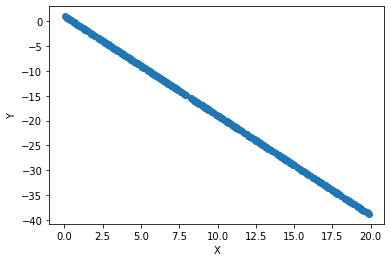

In [4]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### **Step_1:** Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
def gradientDesc(x,y,alpha,max_iters):
    m=len(x)
    theta_0=0
    theta_1=0
    theta0_list=[]
    theta1_list=[]
    cost_func=0
    loss_list=[]
    y_predict=[]
    y_predict_list=[]
    for i in range(max_iters):
        y_predict=theta_0+theta_1*x
        y_predict_list.append(y_predict)
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
        gradient_0=(1/m)*sum(y_predict-y)
        gradient_1=(1/m)*sum((y_predict-y)*x)
        theta_0=theta_0-alpha*gradient_0
        theta0_list.append(theta_0)
        theta_1=theta_1-alpha*gradient_1
        theta1_list.append(theta_1)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1


In [6]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1=gradientDesc(x,y,0.01,1000)
print(f"all theta0 through iterations : \n {theta0_list}")
print(f"all theta1 through iterations : \n {theta1_list}")
print(f"The loss function through iterations : \n {loss_list}")
print(f"The hyposthesis output for all iterations : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")


all theta0 through iterations : 
 [-0.18016129255047808, -0.1335298494547992, -0.14089883019691782, -0.13542225277042422, -0.13301352575474018, -0.12988425812394463, -0.12693629293855438, -0.12395491058146396, -0.12099120175233136, -0.11803297809618389, -0.11508311561326343, -0.1121409041328396, -0.10920648727964047, -0.10627980548994698, -0.10336084763827083, -0.10044959113462938, -0.097546016184884, -0.09465010239573107, -0.09176182958274678, -0.08888117757784814, -0.0860081262749547, -0.08314265561894447, -0.08028474560810972, -0.07743437629339922, -0.07459152777842643, -0.07175618021929522, -0.06892831382447, -0.06610790885463545, -0.06329494562255915, -0.060489404492954195, -0.057691265882342004, -0.05490051025891579, -0.052117118142403995, -0.04934107010393457, -0.04657234676589917, -0.04381092880181794, -0.041056796936204634, -0.03830993194443209, -0.035570314652597905, -0.03283792593739082, -0.03011274672595702, -0.027394757995767103, -0.0246839407744833, -0.021980276139827008,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.9999864225039805


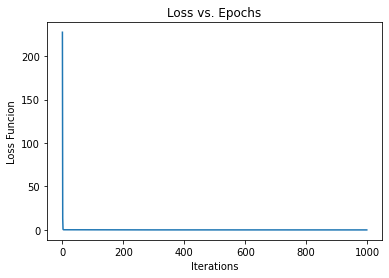

In [8]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

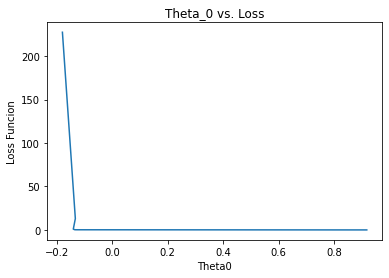

In [9]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

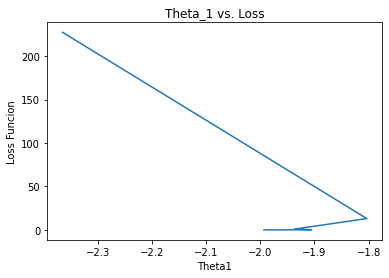

In [10]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

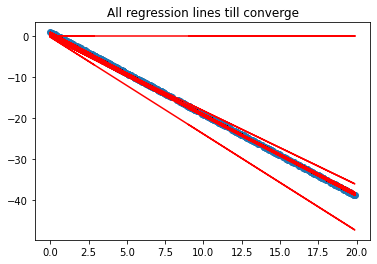

In [11]:
plt.scatter(x,y,label='observed data')
for i in range(len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

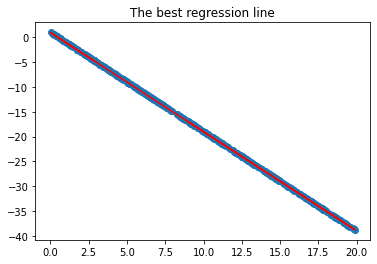

In [12]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

### **Step_2:** Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

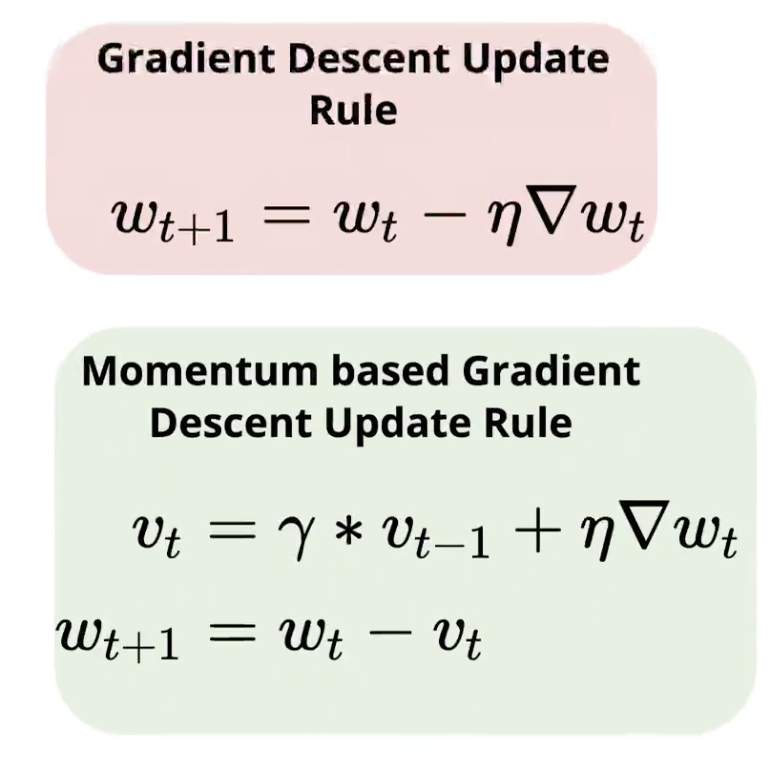

In [13]:
def batchGDMomentum(x,y,alpha,max_iters,gamma):
    theta_0 = 0
    theta_1 = 0
    vt_0=0
    vt_1=0
    y_predict = theta_0 + theta_1 * x
    m=len(x)
    cost_func=(1/(2*m))*sum((y_predict-y)**2)
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    y_predict_list=[]
    for i in range(max_iters): 
        y_predict = theta_0 + theta_1 * x
        y_predict_list.append(y_predict)
        theta0_grd = (1/m) * np.sum(y_predict - y)
        theta1_grd = (1/m) * np.sum((y_predict - y) * x)
        vt_0=gamma*vt_0+alpha*theta0_grd
        vt_1=gamma*vt_1+alpha*theta1_grd
        theta_0 = theta_0 - vt_0
        theta0_list.append(theta_0)
        theta_1 = theta_1 - vt_1
        theta1_list.append(theta_1)
        cost_func=(1/(2*m))*sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1

In [14]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1=batchGDMomentum(x,y,0.01,500,0.9)
print(f"all theta0 through iterations : \n {theta0_list}")
print(f"all theta1 through iterations : \n {theta1_list}")
print(f"The loss function through iterations : \n {loss_list}")
print(f"The hyposthesis output for all iterations : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")

all theta0 through iterations : 
 [-0.18016129255047816, -0.2956750127502295, -0.20289287959058297, -0.027411029355055905, 0.01802312841466855, -0.094681011441066, -0.19292253472810744, -0.13742393253810903, 0.008432548508150478, 0.07712658997604288, 0.014616488518281012, -0.06428269584008647, -0.035098395425755075, 0.08107786196539189, 0.15812154890164778, 0.13140272201345488, 0.07153820477697174, 0.08333535338876022, 0.1725212655333288, 0.2484755516155719, 0.24598229184202244, 0.2033622505020568, 0.20461426589117648, 0.2707968458454927, 0.3402016655689436, 0.35298572126318356, 0.3250360423172521, 0.3206942569995747, 0.36822329705163, 0.42839906127667265, 0.44979965118590437, 0.433670654230872, 0.42710139180143686, 0.46012899099613586, 0.510246258279744, 0.5355141695863738, 0.5284230131933295, 0.5217437318792779, 0.5439259422975452, 0.5843077766451997, 0.6102285534997329, 0.6096673170467829, 0.6040654038892421, 0.61843938957601, 0.6500572650512931, 0.6746022264504612, 0.67844407217148

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  1.0


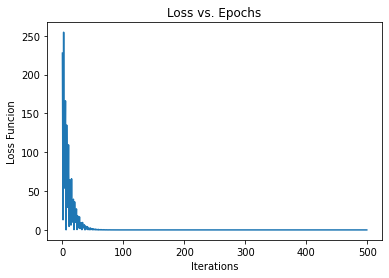

In [16]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

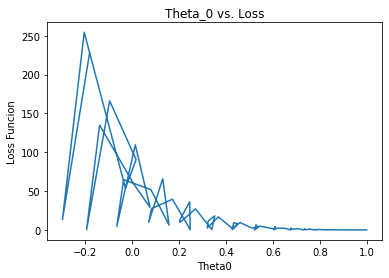

In [17]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

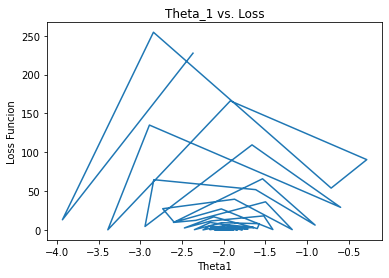

In [18]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

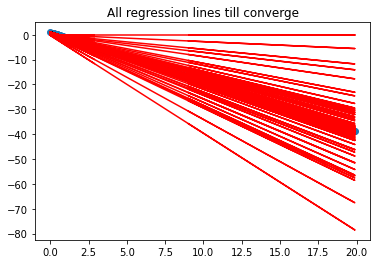

In [19]:
plt.scatter(x,y,label='observed data')
for i in range(len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

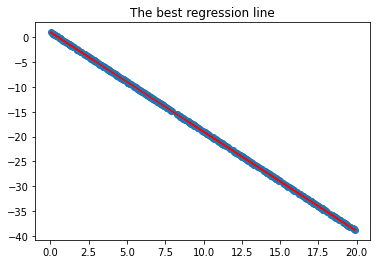

In [20]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

#### **Step_3:** Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [21]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1=batchGDMomentum(x,y,0.01,500,0)
print(f"all theta0 through iterations : \n {theta0_list}")
print(f"all theta1 through iterations : \n {theta1_list}")
print(f"The loss function through iterations : \n {loss_list}")
print(f"The hyposthesis output for all iterations : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")

all theta0 through iterations : 
 [-0.18016129255047816, -0.13352984945479915, -0.14089883019691782, -0.1354222527704242, -0.13301352575474018, -0.12988425812394463, -0.12693629293855438, -0.12395491058146396, -0.12099120175233136, -0.11803297809618389, -0.11508311561326341, -0.11214090413283959, -0.10920648727964045, -0.10627980548994698, -0.10336084763827083, -0.10044959113462938, -0.097546016184884, -0.09465010239573107, -0.09176182958274678, -0.08888117757784814, -0.0860081262749547, -0.08314265561894447, -0.08028474560810972, -0.07743437629339923, -0.07459152777842644, -0.07175618021929524, -0.06892831382447001, -0.06610790885463547, -0.06329494562255916, -0.06048940449295421, -0.05769126588234202, -0.054900510258915805, -0.052117118142404016, -0.04934107010393459, -0.04657234676589919, -0.04381092880181796, -0.041056796936204655, -0.03830993194443211, -0.03557031465259793, -0.03283792593739085, -0.03011274672595705, -0.027394757995767138, -0.024683940774483333, -0.021980276139827

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.9998093506312515


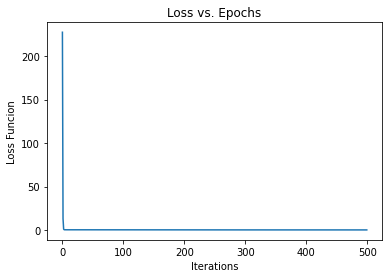

In [23]:
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss Funcion")
plt.title("Loss vs. Epochs")
plt.show()

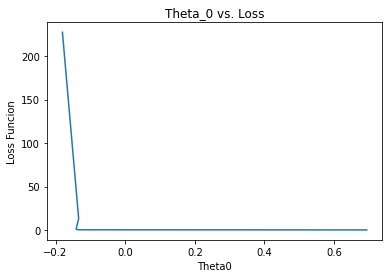

In [24]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

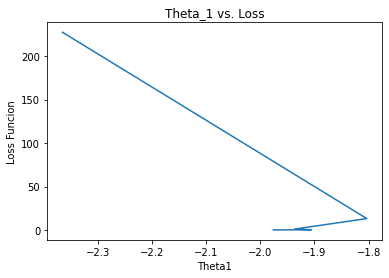

In [25]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

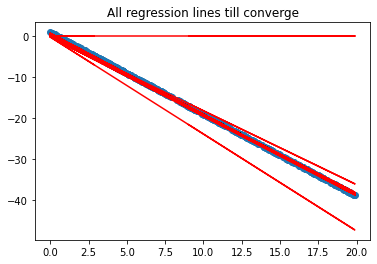

In [26]:
plt.scatter(x,y,label='observed data')
for i in range(len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

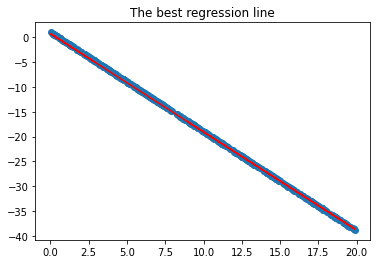

In [27]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

In [28]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1=batchGDMomentum(x,y,0.01,500,0.000001)
print(f"all theta0 through iterations : \n {theta0_list}")
print(f"all theta1 through iterations : \n {theta1_list}")
print(f"The loss function through iterations : \n {loss_list}")
print(f"The hyposthesis output for all iterations : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")

all theta0 through iterations : 
 [-0.18016129255047816, -0.1335300296160917, -0.14089873693421176, -0.13542227487704636, -0.13301350384861457, -0.12988424608021054, -0.1269362741629672, -0.12395488994567806, -0.12099117790125566, -0.11803295142277964, -0.1150830860310008, -0.11214087168432292, -0.10920645197307068, -0.10627976734249306, -0.1033608066646882, -0.1004495473502213, -0.09754596960473692, -0.09465005303491122, -0.09176177745625023, -0.08888112270061371, -0.086008068661861, -0.08314259528481092, -0.0802846825676965, -0.07743431056140766, -0.07459145936949901, -0.07175610914801597, -0.06892824010536464, -0.06610783250217148, -0.06329486665114625, -0.060489322916944296, -0.057691181716029556, -0.05490042351653788, -0.052117028838140726, -0.04934097825190907, -0.04657225238017787, -0.043810831896410815, -0.041056697525065355, -0.03830983004145821, -0.03557021027163113, -0.03283781909221713, -0.030112637430306885, -0.027394646263315735, -0.02468382661885076, -0.02198015957457847

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.9998093511359402


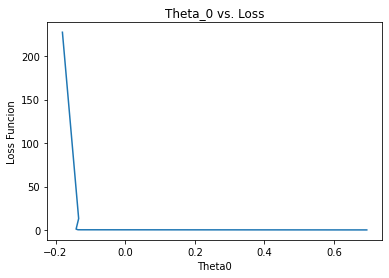

In [30]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

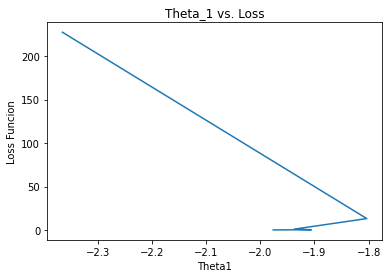

In [31]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

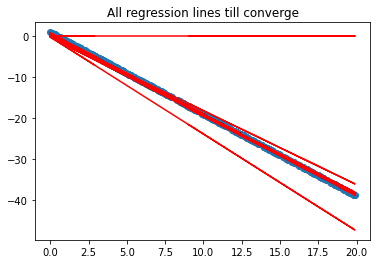

In [32]:
plt.scatter(x,y,label='observed data')
for i in range(len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

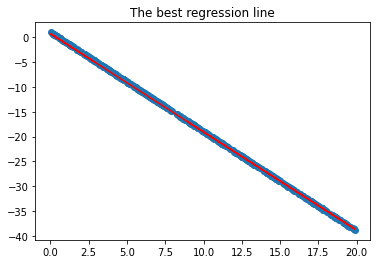

In [33]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

In [34]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1=batchGDMomentum(x,y,0.01,500,0.9999999)
print(f"all theta0 through iterations : \n {theta0_list}")
print(f"all theta1 through iterations : \n {theta1_list}")
print(f"The loss function through iterations : \n {loss_list}")
print(f"The hyposthesis output for all iterations : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")

all theta0 through iterations : 
 [-0.18016129255047816, -0.31369112398914806, -0.2277972098500699, -0.01763487346178777, 0.07147157778570486, -0.05228386079090398, -0.21357630252709348, -0.18707126860853435, 0.02352976769067444, 0.1899952372718754, 0.14204238050381138, -0.021936771867929916, -0.056793746088732056, 0.1257563791102898, 0.3477137757598466, 0.38504190135713856, 0.24490452057283404, 0.15665566240723128, 0.2877378974718696, 0.5362246709654284, 0.6568523765410366, 0.5645071375779044, 0.43943150436421763, 0.5038992046265851, 0.7468487650584341, 0.9373969068754259, 0.9105017544721811, 0.7711077822702133, 0.7640290638124687, 0.9706638558394696, 1.2080269429542885, 1.2551043646455553, 1.126289994522521, 1.0533732553860915, 1.1983788163183495, 1.4527808307709236, 1.571677267470012, 1.4768087620641273, 1.3532665778937099, 1.4201598027032853, 1.6591703299818485, 1.8370616347235365, 1.7942745213663454, 1.642311056172289, 1.625533727821936, 1.8184813740594543, 2.0334436887409373, 2.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  -4.029096918238326


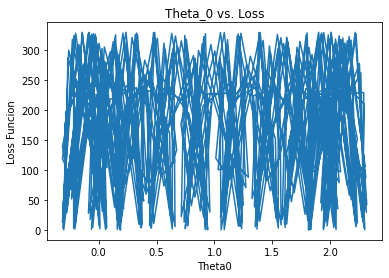

In [36]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

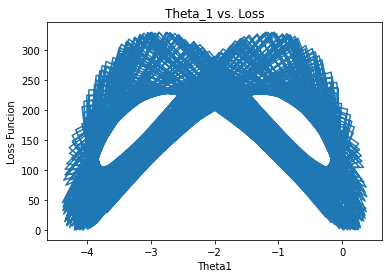

In [37]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

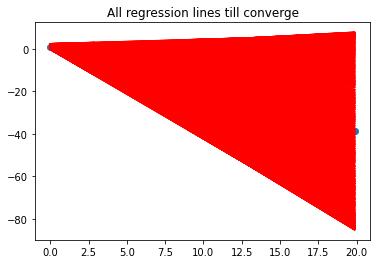

In [38]:
plt.scatter(x,y,label='observed data')
for i in range(len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

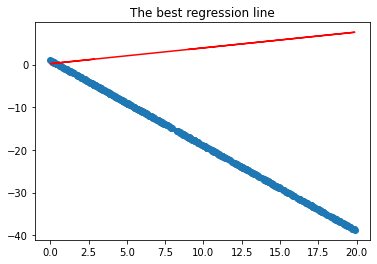

In [39]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

### **Step_4: **Update your Batch GD for one variable  implementation to be NAG and check your results

In [124]:
def BatchNAG(x,y,alpha,max_iters,gamma):
    theta_0 = 0
    theta_1 = 0
    vt_0=0
    vt_1=0
    gamma=0.9
    theta0_temp=0
    theta1_temp=0
    y_predict = 0
    y_predict_list=[]
    cost_func=0
    loss_list=[]
    theta0_list=[]
    theta1_list=[]
    m=len(x)
    for i in range(max_iters): 
        theta0_temp=theta_0-gamma*vt_0 # here we moved to temp theta0 just using momentum
        theta1_temp=theta_1-gamma*vt_1 # here we moved to temp theta1 just using momentum
        y_predict = theta0_temp + theta1_temp * x # here we predict y value for using it to get the gradient of temp thetas
        theta0_future_grd = (1/m)*np.sum(y_predict - y) # here we get the gradient of future theta0 which is based on just momentum
        theta1_future_grd = (1/m)*np.sum((y_predict - y) * x) # here we get the gradient of future theta1 which is based on just momentum
        vt_0=gamma*vt_0+alpha*theta0_future_grd #here we get the mometum0 term based on the current momentum0 and gradient of future theta0
        vt_1=gamma*vt_1+alpha*theta1_future_grd #here we get the mometum1 term based on the current momentum1 and gradient of future theta1
        theta_0 = theta_0 - vt_0 # here the actual next theta0
        theta0_list.append(theta_0) 
        theta_1 = theta_1 - vt_1 # here the actual next theta1
        theta1_list.append(theta_1)
        y_predict = theta_0 + theta_1 * x # the actual prediction of y
        y_predict_list.append(y_predict)
        cost_func=sum((y_predict-y)**2)
        loss_list.append(cost_func)
    return theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1


In [125]:
theta0_list,theta1_list,loss_list,y_predict_list,theta_0,theta_1=BatchNAG(x,y,0.001,200,0.9)
print(f"all theta0 through iterations : \n {theta0_list}")
print(f"all theta1 through iterations : \n {theta1_list}")
print(f"The loss function through iterations : \n {loss_list}")
print(f"The hyposthesis output for all iterations : \n {y_predict_list}")
print(f"The optimum theta_0 = {theta_0}")
print(f"The optimum theta_1 = {theta_1}")

all theta0 through iterations : 
 [-0.0195085412298318, -0.051341880933530884, -0.08818810817387229, -0.12365715966856958, -0.1529656072268836, -0.1732431923722781, -0.18350367925040623, -0.18435973953508095, -0.17757925894149734, -0.16558058908303214, -0.15095079434384462, -0.13604880316565351, -0.12272960177819497, -0.1122006121667425, -0.10500048052273524, -0.10107566020679856, -0.0999221024682768, -0.10075766684423307, -0.10269433308578842, -0.10488628939004063, -0.10663872026498006, -0.10747100790682139, -0.10713582369601068, -0.1056013946196254, -0.10300771479291845, -0.09960867286111659, -0.09571132952042878, -0.09162144470170977, -0.08760143333351202, -0.08384380575300138, -0.08046030411497054, -0.07748471296254593, -0.07488587360918153, -0.0725867930220382, -0.07048581505401208, -0.0684764430554335, -0.06646335904537493, -0.06437326714118027, -0.06216021864150891, -0.05980592156870439, -0.05731612241440686, -0.05471444954259008, -0.05203514799189668, -0.04931596757449218, -0.0

The hyposthesis output for all iterations : 
 [array([-4.46295857, -1.01083421, -0.60062668, -2.2948547 , -0.83922207,
       -2.6619317 , -3.14354956, -3.87460489, -3.9466362 , -3.07029027,
       -2.55409467, -3.90259127, -3.38163707, -2.65995536, -3.27825791,
       -4.42153459, -4.84399711, -3.91019075, -2.93511574, -5.18766464,
       -3.71872965, -3.2229676 , -0.25941903, -2.60903923, -0.95393878,
       -4.74895615, -4.83960624, -2.32977602, -1.13771168, -2.4333759 ,
       -4.77628431, -3.14938637, -2.07155017, -0.12177956, -2.95955524,
       -1.35836887, -4.07642707, -2.84013996, -4.00454699, -1.43452074,
       -5.31689722, -3.37538411, -5.09569041, -0.49397074, -4.29280496,
       -0.46699526, -3.88165558, -3.88260607, -1.42417581, -3.42085795,
       -2.9489141 , -4.31754512, -0.77275603, -0.29265071, -2.61877697,
       -3.91489773, -3.71972018, -4.50739911, -3.57230058, -0.78215276,
       -1.81740957, -0.44823122, -3.17320181, -2.40278024, -0.57731259,
       -1.2158234

In [126]:
y_predict=theta_0+theta_1*x
y_mean=np.mean(y)
ss_tot=sum((y-y_mean)**2)
ss_res=sum((y-y_predict)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  0.999072941673116


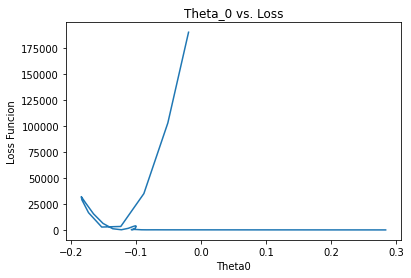

In [127]:
plt.plot(theta0_list,loss_list)
plt.xlabel("Theta0")
plt.ylabel("Loss Funcion")
plt.title("Theta_0 vs. Loss")
plt.show()

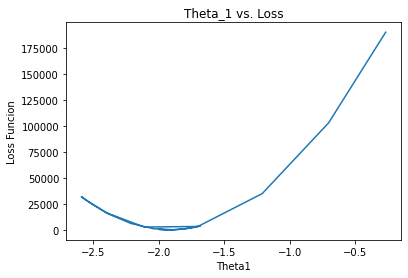

In [128]:
plt.plot(theta1_list,loss_list)
plt.xlabel("Theta1")
plt.ylabel("Loss Funcion")
plt.title("Theta_1 vs. Loss")
plt.show()

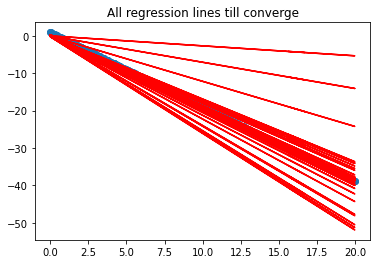

In [129]:
plt.scatter(x,y,label='observed data')
for i in range(len(y_predict_list)):
    plt.plot(x,y_predict_list[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

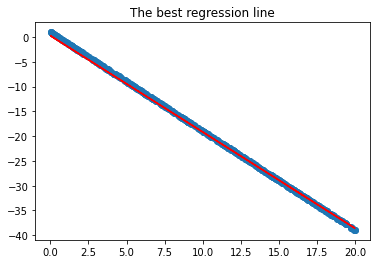

In [130]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

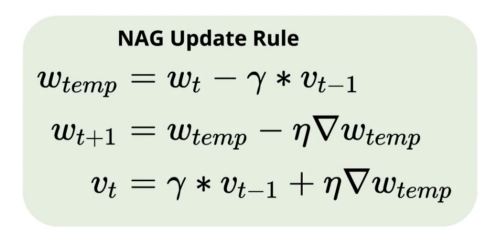